In [12]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import pickle
from PIL import Image
import matplotlib.pyplot as plt
import hmax

In [2]:
model = hmax.HMAX('./universal_patch_set.mat')

In [3]:
# A folder with example images
example_images = datasets.ImageFolder(
    './example_images/',
    transform=transforms.Compose([
        transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x * 255),
    ])
)

# A dataloader that will run through all example images in one batch
dataloader = DataLoader(example_images, batch_size=10)


In [4]:
torch.cuda.is_available()

False

In [5]:
# Determine whether there is a compatible GPU available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [6]:
# Run the model on the example images
#s2: 1st neuron; 2nd image; 3rd filter; 4th (64,64) picture;
model = model.to(device)
for X, y in dataloader:
    s1, c1, s2, c2 = model.get_all_layers(X.to(device))


In [101]:
len(s2), len(s2[0]), len(s2[0][0]), len(s2[0][0][0]), s2[0][0][0][0].shape

(8, 8, 10, 400, (64, 64))

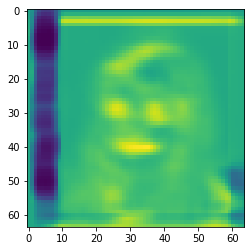

In [117]:


plt.imshow(s2[2][0][9][0])

In [82]:
c2[0].shape, c2[0][0].shape

((10, 400), (400,))

In [58]:
c2[0]

(10, 400)

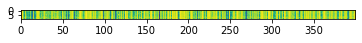

In [63]:
plt.imshow(c2[2])

In [ ]:
with open('output.pkl', 'wb') as f:
    pickle.dump(dict(s1=s1, c1=c1, s2=s2, c2=c2), f)